**<h1><center>Minor Project Begins Here<center/><h1/>**

# Project Pre-Requisite

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


First we will import all the necessary libraries. I'll use numpy for arrays and pandas for datasets(csv files) to start with. For visualization, I will use pyplot subpackage of matplotlib, rcParams to add styling to the plots and rainbow for colors. For implementing Machine Learning models and processing of data, I will use the sklearn library.

In [2]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In order to process the data, I'll import some libraries. To split the available dataset for testing and training, I'll use the train_test_split method and StandardScaler to scale the features.

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



Now I'll import all the Machine Learning algorithms I will be using in this project.

    K Neighbors Classifier
    Support Vector Classifier
    Decision Tree Classifier
    Random Forest Classifier



In [4]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

Now we will import the dataset used in this project.

In [29]:
# importing and reading data file
df = pd.read_csv("/content/drive/MyDrive/Datasets/heart.csv")
df.shape

(303, 14)

# Data Analysis

After importing all the required libraries and importing the dataset we will read the data using the read_csv method of pandas library. 

In [30]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [31]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


Once the dataset is loaded onto the variable df, we will take a look at the data using describe and info methods and then start processing and visualizing it

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [33]:
# Data Description
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [34]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

**The Dataset**
 1. age

 2. sex : displays the gender of the individual using the following format
> *    male = 1
> *    female = 0

 3. Chest-pain type : displays the type of chest-pain experienced by the individual using the following format
>*   1 = typical angina
>*   2 = atypical angina
>*   3 = non — anginal pain
>*   4 = asymptotic

4. Resting Blood Pressure : displays the resting blood pressure value of an individual in mmHg (unit)

5. Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl.
>* If fasting blood sugar > 120mg/dl then : 1 (true)
>* else : 0 (false)

7. Resting ECG : displays resting electrocardiographic results
>* 0 = normal
>* 1 = having ST-T wave abnormality
>* 2 = left ventricular hyperthrophy

8. Max heart rate achieved : displays the max heart rate achieved by an individual.

9. Exercise induced angina :
>* 1 = yes
>* 0 = no

10. ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. Peak exercise ST segment :
>* 1 = upsloping
>* 2 = flat
>* 3 = downsloping

12. target : existance of heart disease
>* 1 = heart disease 
>* 0 = Normal


Now we will check for null values in our dataset

In [35]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Plotting the null values

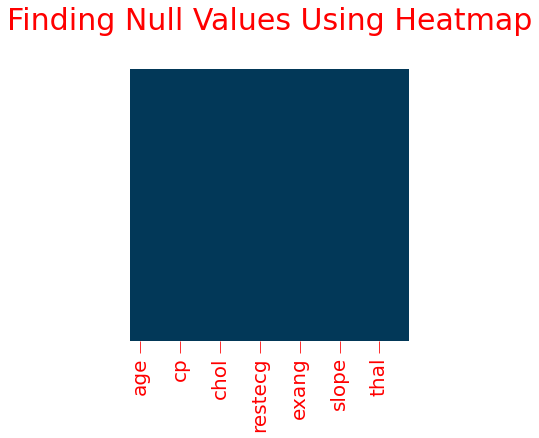

In [36]:
plt.figure(figsize=(5,5))
plt.xticks(size=20,color='red')
plt.tick_params(size=12,color='red')
plt.title('Finding Null Values Using Heatmap\n',color='red',size=30)
sn.heatmap(df.isnull(),
            yticklabels=False,
            cbar=False,
            cmap='PuBu_r',
            )

It is evident that there are no null values. Now we will start visualising our data to understand it better and look for any processing required

First we will plot a correlation matrix

In [ ]:
# rcParams['figure.figsize'] = 50, 14
# plt.matshow(df.corr())
# plt.yticks(np.arange(df.shape[1]), df.columns)
# plt.xticks(np.arange(df.shape[1]), df.columns)
# plt.colorbar()

# Data Visualization

## The correlation Matrix

In [37]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


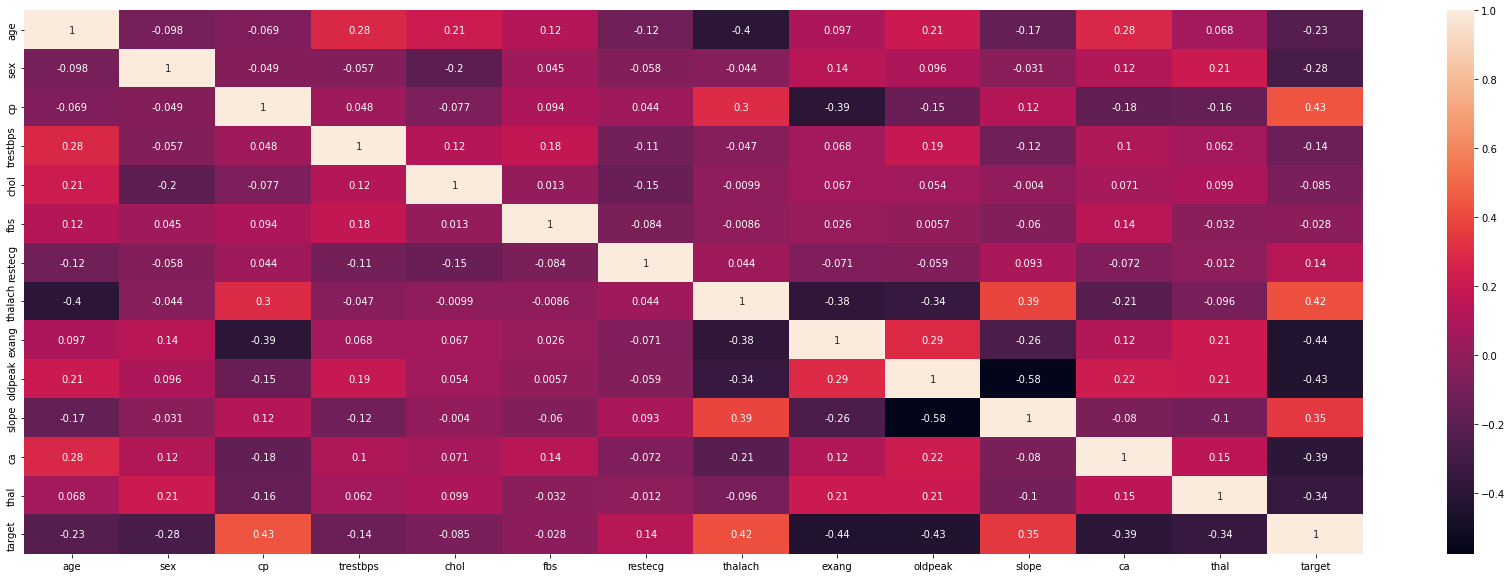

In [38]:
corrMatrix = df.corr()
plt.figure(figsize=(30,10))
sn.heatmap(corrMatrix, annot=True)
plt.show()

### Observation

*   From the above correlation matrix we found out that a few features have a negative correlation with the target value while some have a positive correlation. 
*   It’s easy to see that there is no single feature that has a very high correlation with our target value. Also, some of the features have a negative correlation with the target value and some have positive.



Next we will plot some histograms for each variable.

## Histograms

<p>The best part about this type of plot is that it just takes a single command to draw the plots and it provides so much information in return.</p>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f102a15ff90>,
      dtype=object)

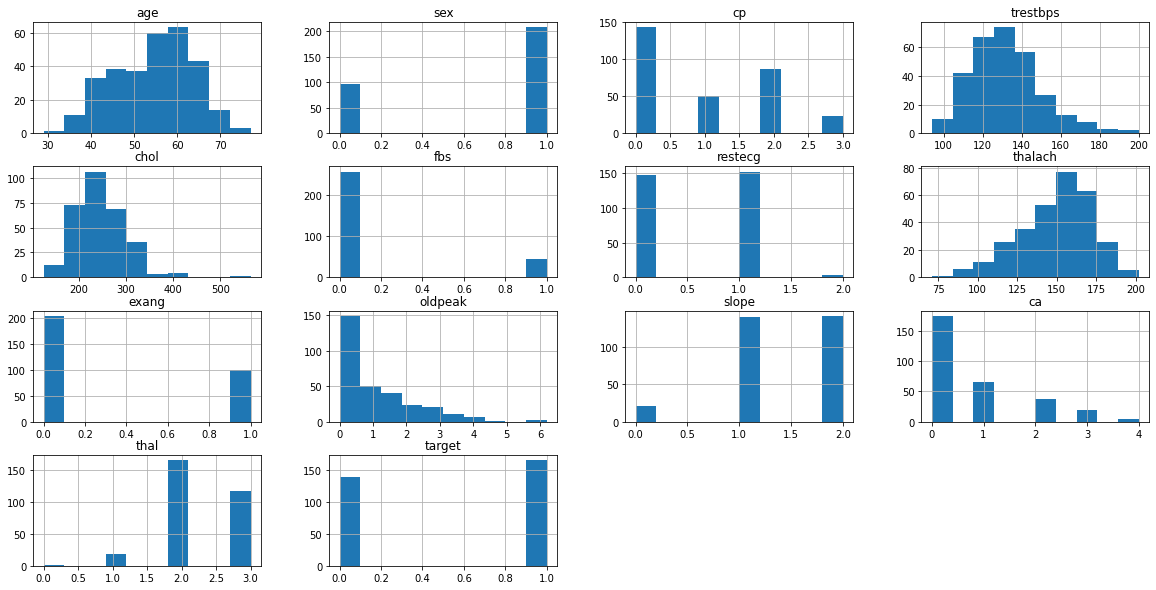

In [39]:
df.hist(figsize=(20,10))

Text(0.5, 1.0, 'Max heart rate of Patients\n')

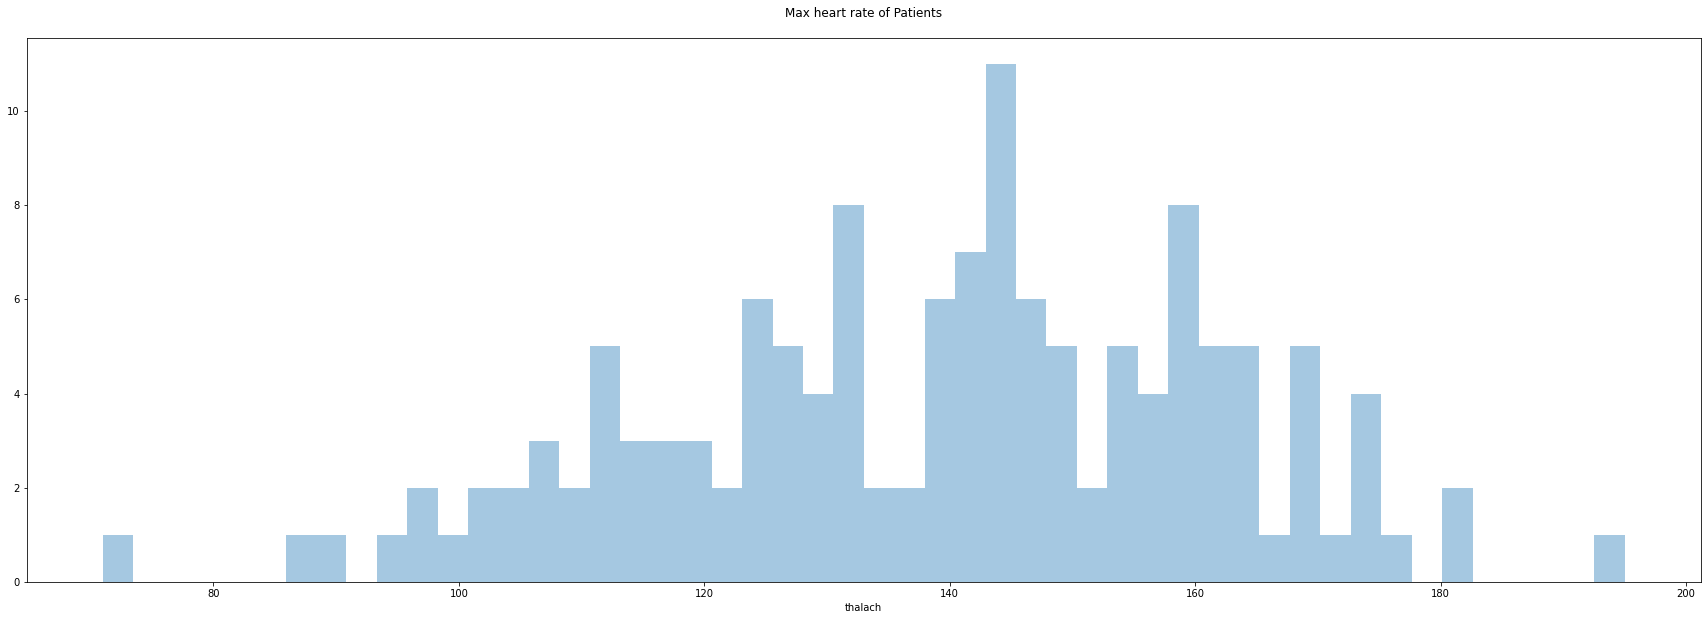

In [50]:
plt.figure(figsize=(30,10))
sn.distplot(df[df['target']==0]['thalach'],kde=False,bins=50)
plt.title('Max heart rate of Patients\n')

## The Bar Plot

<p>It’s really essential that the dataset we are working on should be approximately balanced. An extremely imbalanced dataset can render the whole model training useless and thus, will be of no use</p>

Text(0.5, 1.0, 'Count of each Target Class')

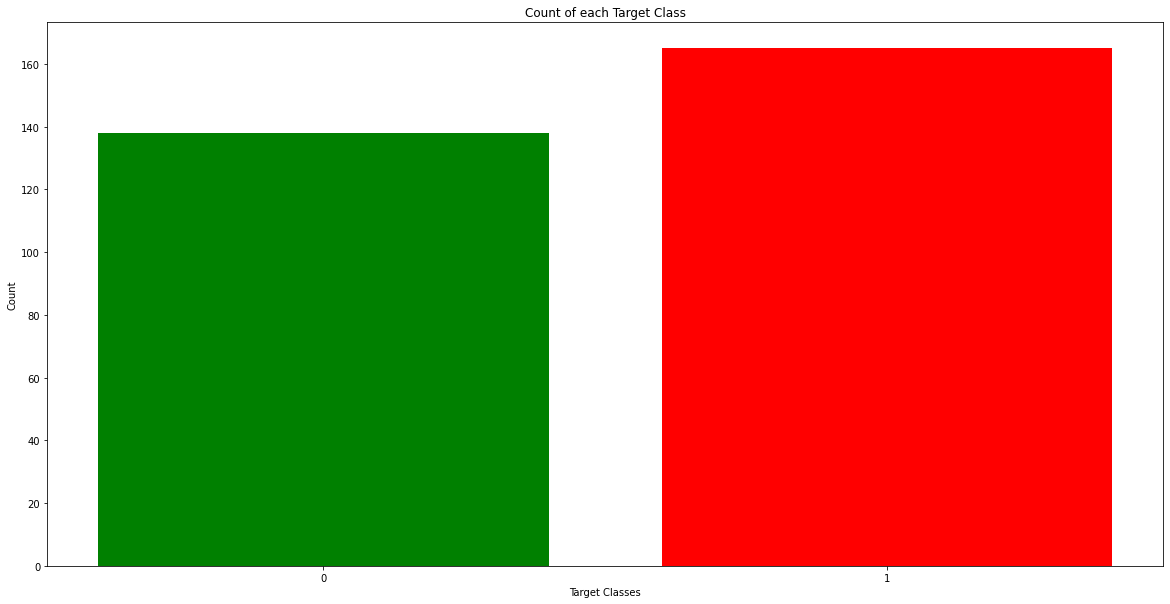

In [40]:
rcParams['figure.figsize'] = 20,10
plt.bar(df['target'].unique(), df['target'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

### Observation


*   From the plot, we can see that the classes are almost balanced and we are good to proceed with data processing.




# Machine Learning

## Train-Test Splitting Dataset 


*   66% testing data
*   33% training data



In [45]:
y = df['target']
X = df.drop(['target'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)

## K Neighbors Classifier

<p>This classifier looks for the classes of K nearest neighbors of a given data point and based on the majority class, it assigns a class to this data point. However, the number of neighbors can be varied. I varied them from 1 to 20 neighbors and calculated the test score in each case.</p>

In [46]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

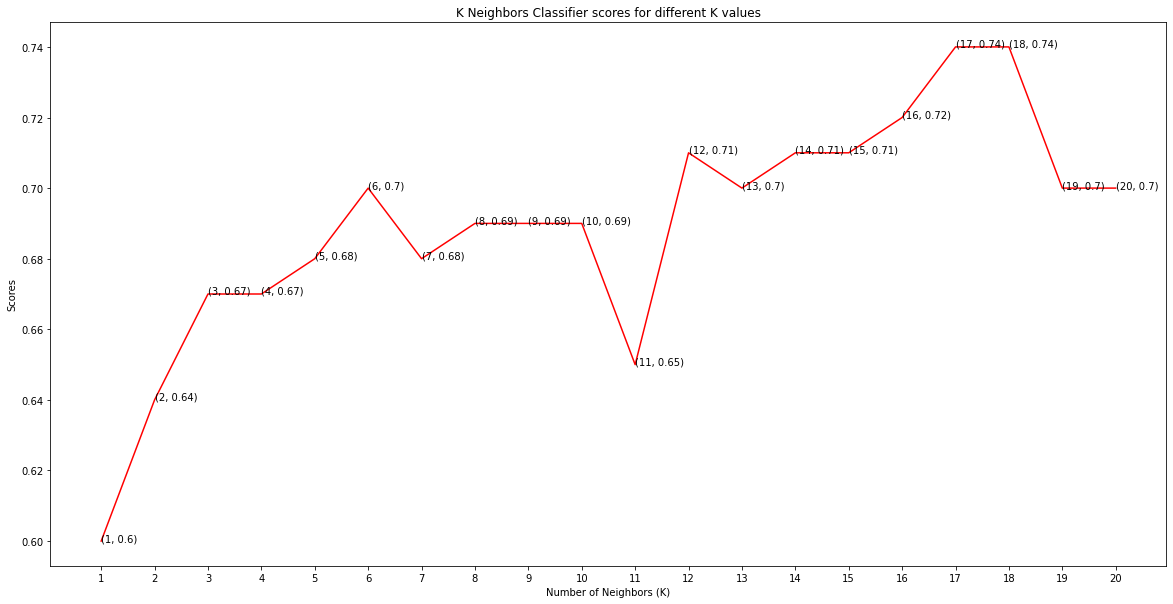

In [47]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

### Observation:


1.   It is evident that we achieve 74% score when the number of neighbors are 17.
2.   A second score of 74% is also achieved when the number of neighbors are 18.



## Support Vector Classifier

<p>This classifier aims at forming a hyperplane that can separate the classes as much as possible by adjusting the distance between the data points and the hyperplane. There are several kernels based on which the hyperplane is decided. I tried four kernels namely, linear, poly, rbf, and sigmoid</p>

In [48]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Support Vector Classifier scores for different kernels')

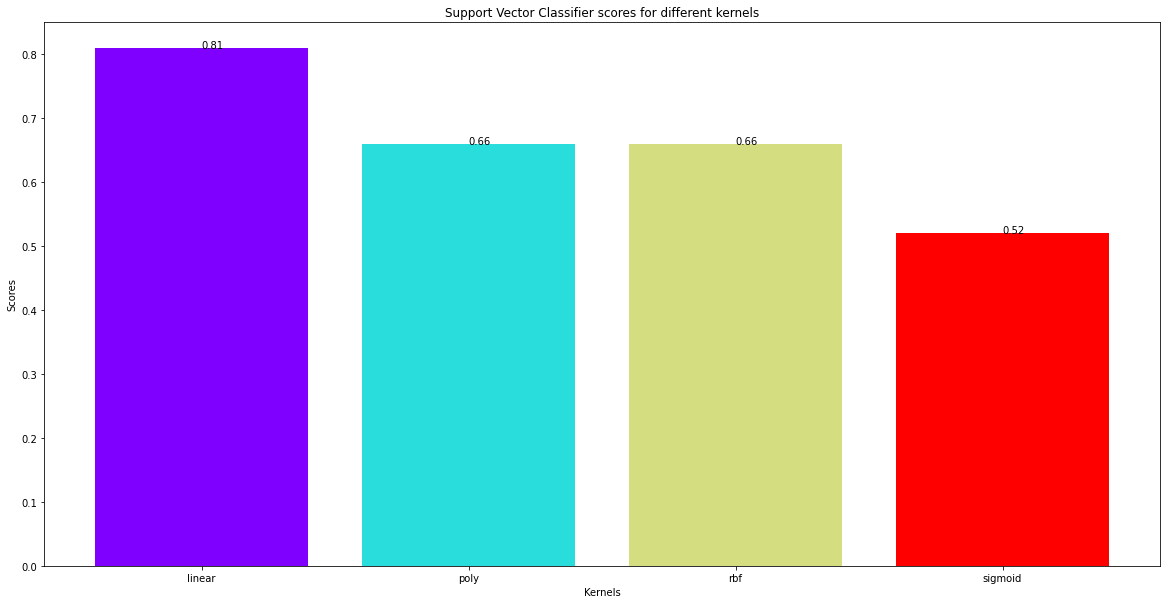

In [49]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

### Observation:
*  As can be seen from the plot above, the linear kernel performed the best for this dataset and achieved a score of 81%